## Wine quality Analysis - Corizo Major project (5th March)

## By - 
### Pragati Gola.
### Srujani Kulkarni.
### Manashwy Padhi.
### Mazin Sunjufy

### Import Dependencies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as ttt
from sklearn.feature_selection import SelectKBest, f_classif

from statsmodels.formula.api import ols, logit

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import (
    accuracy_score,
    log_loss,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, cross_val_score

import tensorflow as tf


### Data discovery

In [17]:
#READING THE DATA
plt.rcParams['figure.figsize'] = (20,10)

df = pd.read_excel("rdw.xlsx")

df.dropna(axis=0,inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    11.0                  34.0  0.99780  3.51       0.56  \
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.52       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.52       0.75   
1597                 32.0                  44.0  0.99547  3.52       0.71   
1598                 18.0                  42.0  0.99549  3.52       0.66   

      alcohol  quality  
0         9.4      5.0  
1         9.8      5.0  
2         9.8      5.0  
3         9.8      6.0  
4         9.4      5.0  
...       ...      ...  
1594     10.5      5.0  
1595     11.2      6.0  
1596     11.0      6.0  
1597     10.2      5.0  
1598     11.0      6.0  

[1596 rows x 12 columns]

In [18]:
#DATA DESCRIPTION
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar   
count    1596.000000       1596.000000  1596.000000     1596.000000  \
mean        8.321366          0.527666     0.271128        2.536936   
std         1.742121          0.179154     0.194847        1.408341   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1596.000000          1596.000000           1596.000000  1596.000000  \
mean      0.087487            15.882206             46.431078     0.996745   
std       0.047107            10.467380             32.893072     0.001889   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996745   
75%       0.090000            21.000000             62.000000     0.997842   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1596.000000  1596.000000  1596.000000  1596.000000  
mean      3.498716     0.658189    10.424217     5.636591  
std       0.080297     0.169587     1.066046     0.807963  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.520000     0.550000     9.500000     5.000000  
50%       3.520000     0.620000    10.200000     6.000000  
75%       3.520000     0.730000    11.100000     6.000000  
max       3.900000     2.000000    14.900000     8.000000

In this analysis we will be focusing on some of the following questions:

1. What chemical characteristics are most important in predicting the quality of wine?
2. Do wines with higher alcohol content receive better ratings?
3. Do sweeter wines (more residual sugar) receive better ratings?
4. What level of acidity is associated with the highest quality?
5. What are the top deciding features to dictate the quality of wine?
6. How does the quality of wine vary with its chemical characteristics?
7. How do the features correlate with each other?
8. Does the classification provide a clean distinction with respect to any of the features?

*These questions are not an exhaustive list and more will be added adhoc.*


We will first find out if the dataset is balanced (all classes have equal samples) or imbalanced. Reasons for imbalanced classes maybe; 
1. Biased Sampling.
2. Errors in Measurement.

<Axes: >

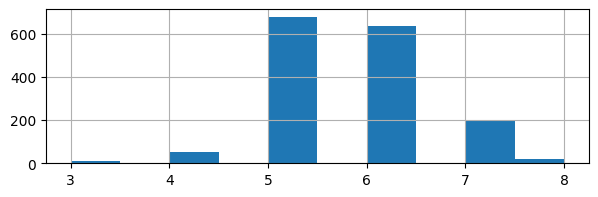

In [19]:
#DATA RESPONSE HISTOGRAM
df['quality'].hist(figsize=(7,2))

<Axes: >

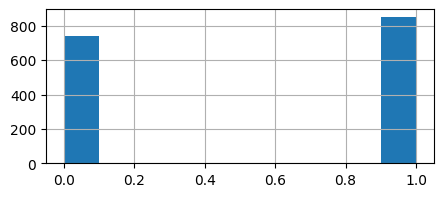

In [20]:
#BINARY RESPONSE HISTOGRAM
df['target'] = df.quality.apply(lambda x: 1 if x>5 else 0)
df.target.hist(figsize=(5,2))

We can see from the above histogram that the classes imbalanced. Taking quality > 5 as 1 will attempt to somewhat balance the classes a little bit by converting the multi-class problem into a binary classification. 

We have the target variable ready for analysis. Let us now make the predictors ready.

### Preprocessing Data

To make the data ready for analysis, some preprossing has been done to the extend of the following:
1. Renaming columns for ease of access
2. Normalization of data to prevent gradient explosion
3. Saving the modified dataset 
4. train-test split for machine learning 

In [21]:
#PREPROCESSING
#Renaming columns

def rename(df):
    cols = df.columns.to_list()
    for i,j in enumerate(cols):
        cols[i] = j.strip(" ")[:4]
    #df.rename(columns=cols)
    return {v:k for k,v in zip(cols,df.columns.to_list())}
cols = rename(df)
dfr = df.rename(mapper=cols,axis=1)

#Normalization
for i in dfr.columns.drop(['qual','targ']).to_list():
    dfr[f'{i}'] = (dfr[f'{i}'] - dfr[f'{i}'].mean())/dfr[f'{i}'].std()

#Saving
dfr.drop('qual',axis=1).to_csv('wine.csv')

#train test split
dfr = dfr.dropna()
X = dfr.drop(['qual','targ'],axis=1)
Yr = dfr['qual']
Yc = dfr['targ']

(xtr,xte,ytr,yte) = ttt(X,Yr,train_size=0.8)#mulit-class
(xtr,xte,ytrr,ytee) = ttt(X,Yc,train_size=0.8)#binary-class



### Exploratory Data Analysis

##### Pairplot analysis:
Attempt to understand the relationship between predictors by plotting them against each other.

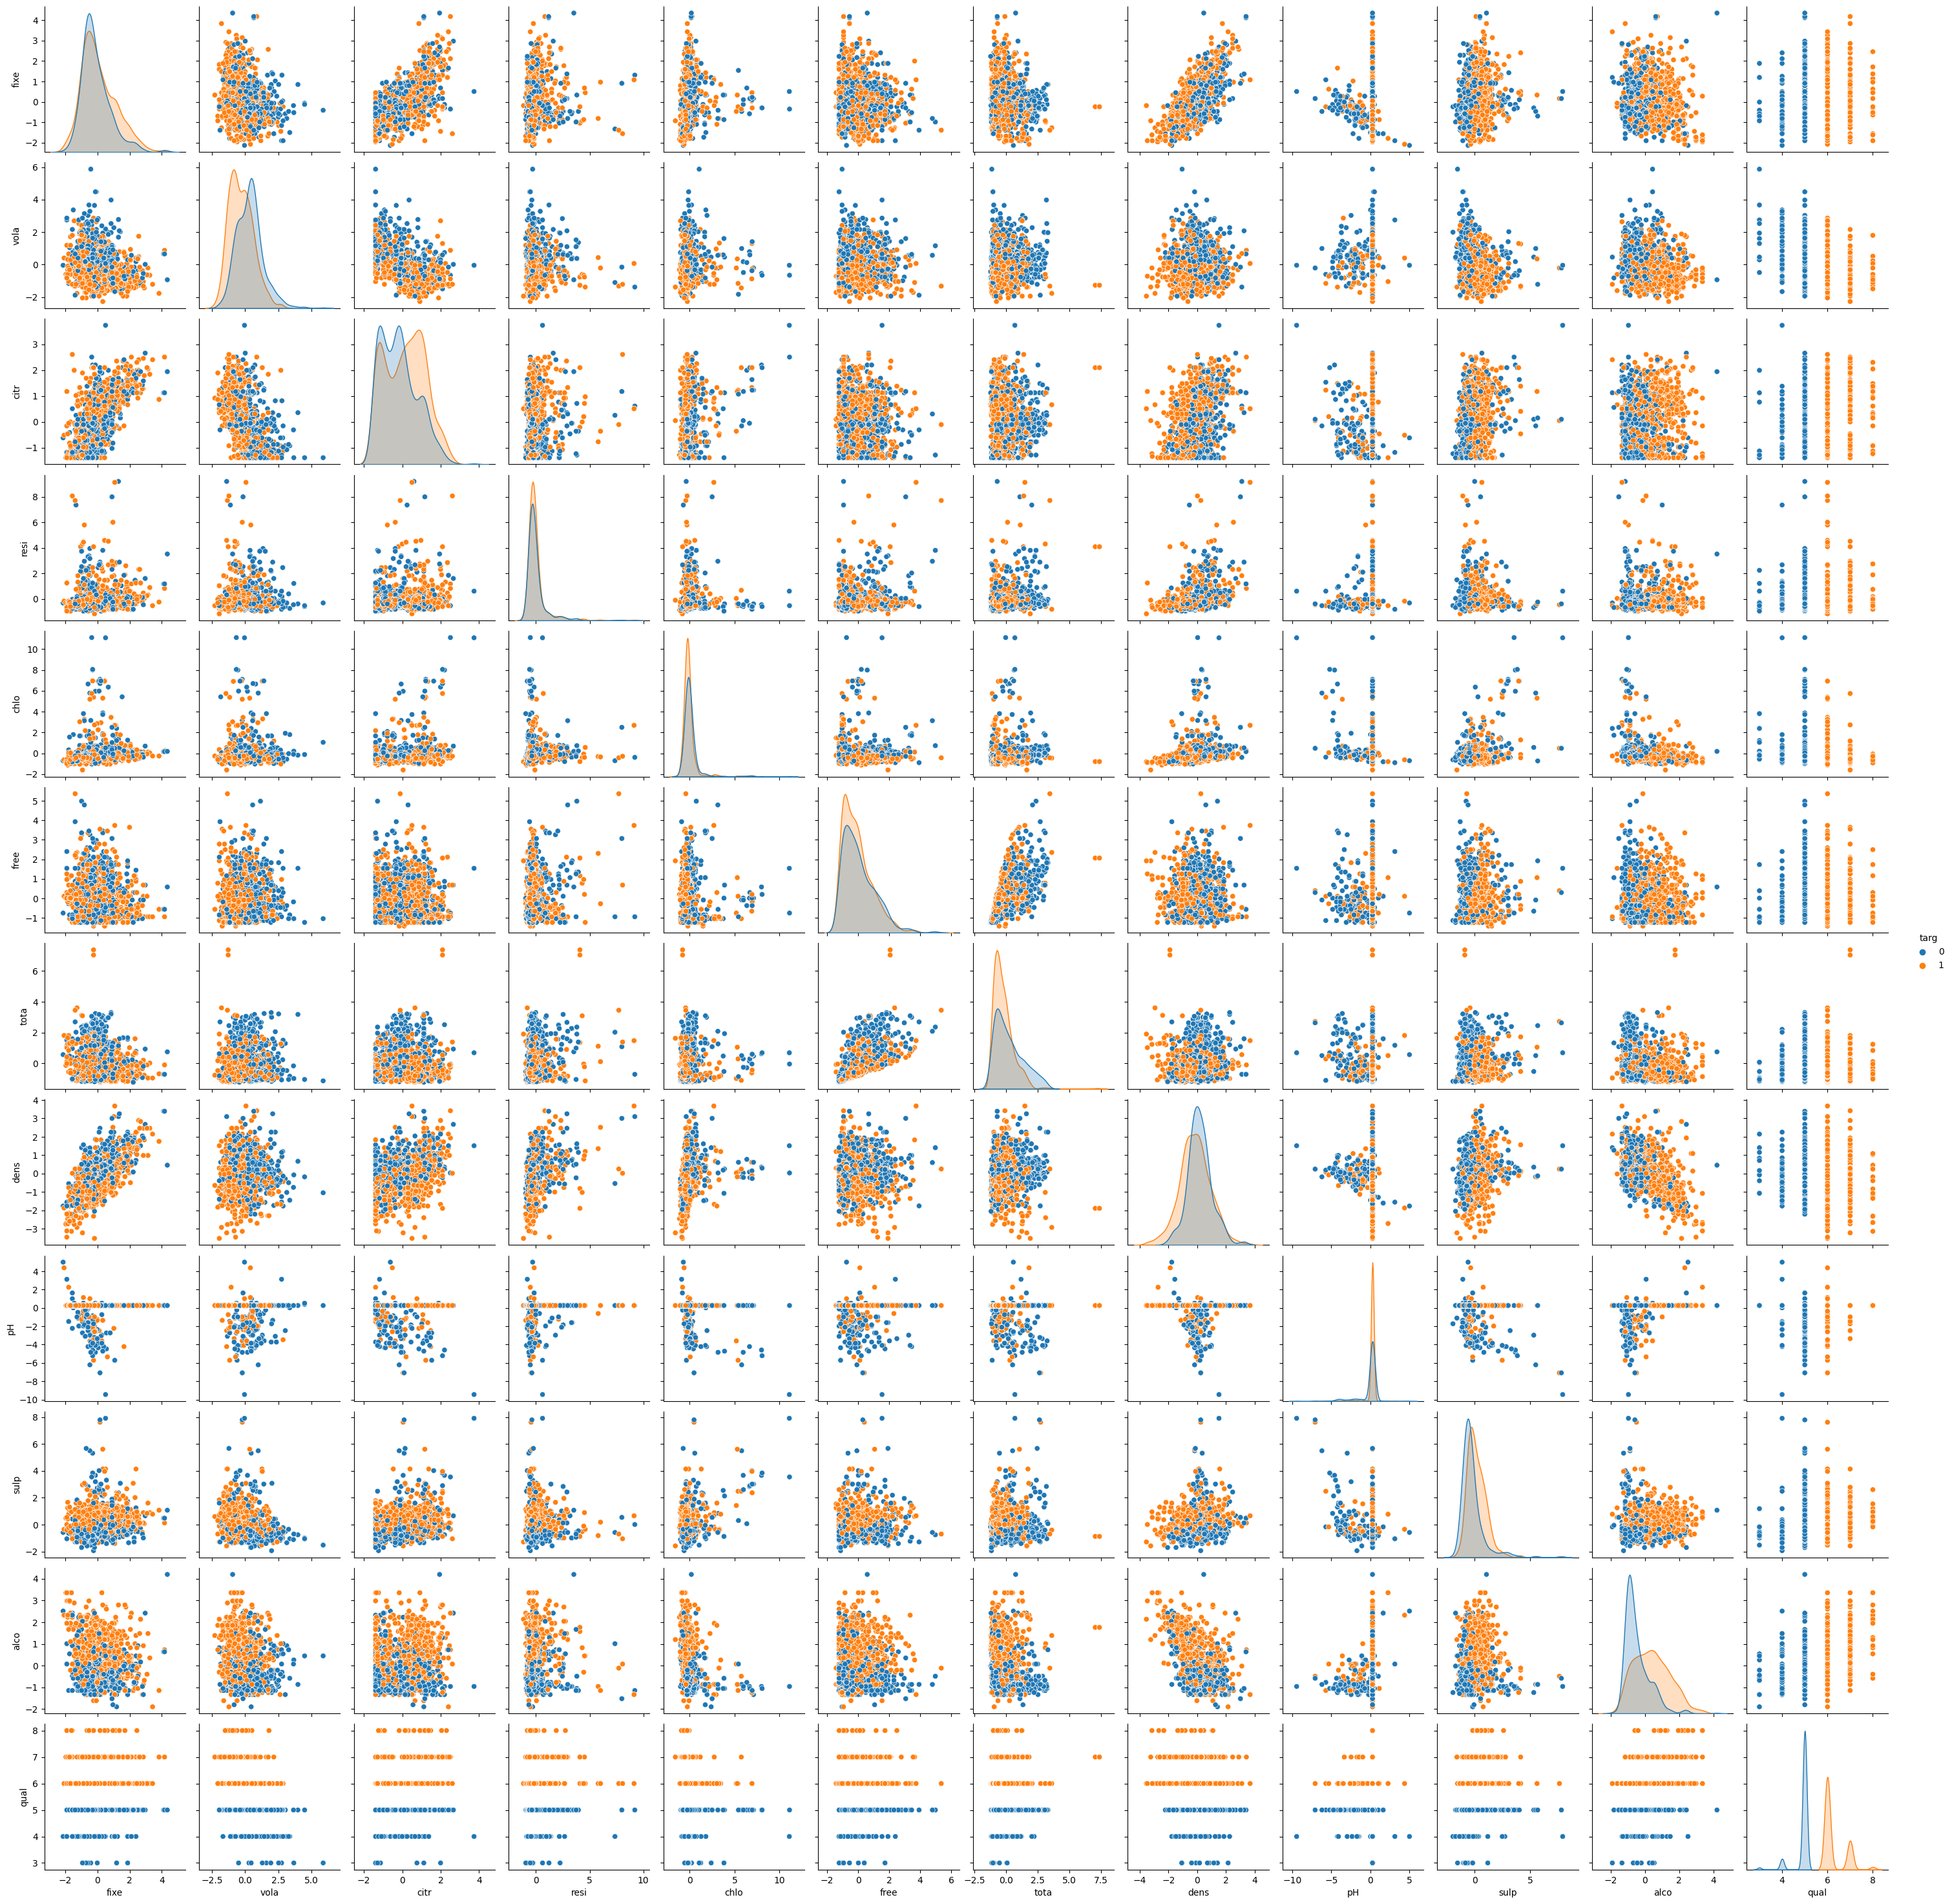

In [22]:
#PAIR-PLOTTING
sns.pairplot(data=dfr,hue='targ',kind='scatter',)

We can understand, from the above scatter plotting, that the predictors do not clearly delineate between the target variable (quality > 5). We can also find that some of the predictors are collinear, or appear to be so.
We proceed to do a multi-collinearity test among the predictors.


##### Correlation Analysis:
Attempt to understand the correlation among the predictors.

Text(0.5, 1.0, "Spearman's correlation")

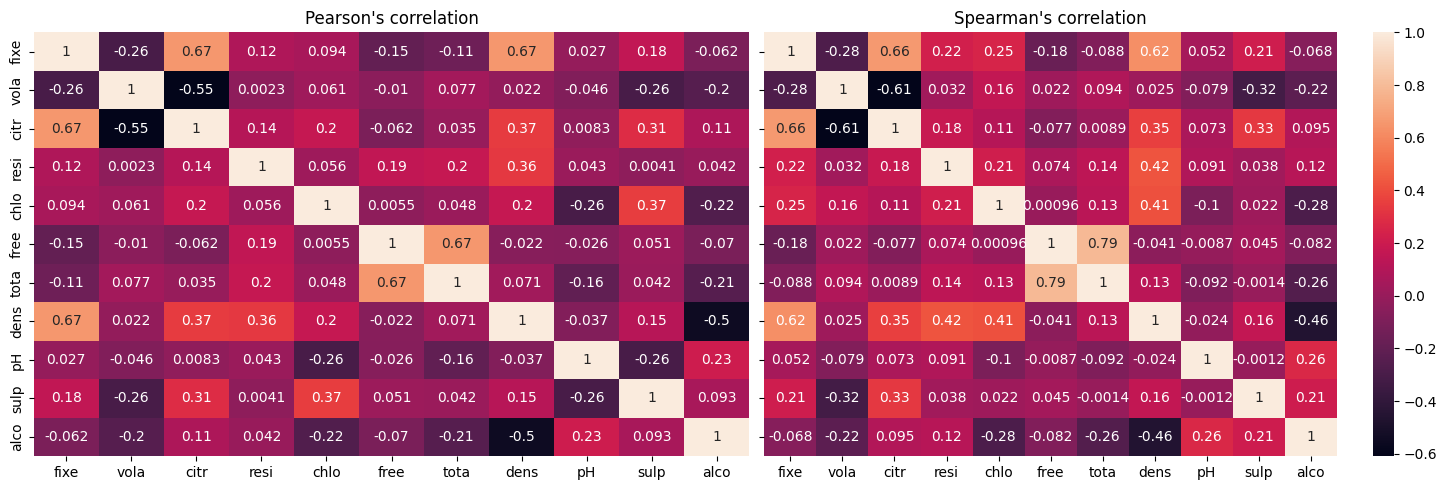

In [23]:
#CORRELATION PLOTTING
corr1 = X.corr(method='pearson')
corr2 = X.corr(method='spearman')

f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),squeeze=True,sharey=True)

sns.heatmap(corr1, annot=True,ax=ax1,cbar=False);sns.heatmap(corr2, annot=True,ax=ax2)
f.set_tight_layout(True)
ax1.set_title("Pearson's correlation");ax2.set_title("Spearman's correlation")


##### Correlation Distribution w.r.t. Quality:
Attempt to find which predictor is correlated with the target and with what magnitude.


<Axes: title={'center': 'Correlation with dependent variable'}>

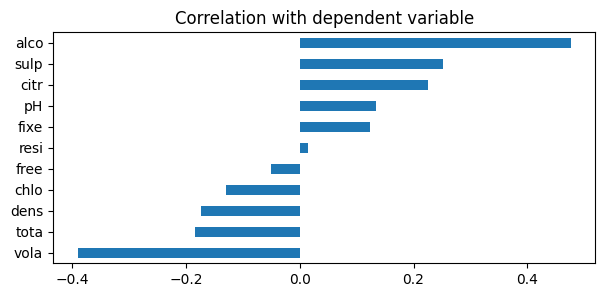

In [24]:
# CORRELATION DISTRIBUTION
corr3 = dfr.drop('targ',axis=1).corr()['qual'].sort_values().drop('qual')
corr3.plot(kind='barh',style='-',figsize=(7,3),title="Correlation with dependent variable")

The bar plot above shows that the features in the middle, such as **residual sugar, chlorides, fixed acidity and free sulfer dioxide** do not seem to impact the quality a lot, and can be ignored for the model building.

##### Feature importance with F-test:
We will use the ANNOVA framework to find out wich predictors are jointly significant in predicting quality.

Index(['vola', 'citr', 'tota', 'dens', 'sulp', 'alco'], dtype='object')

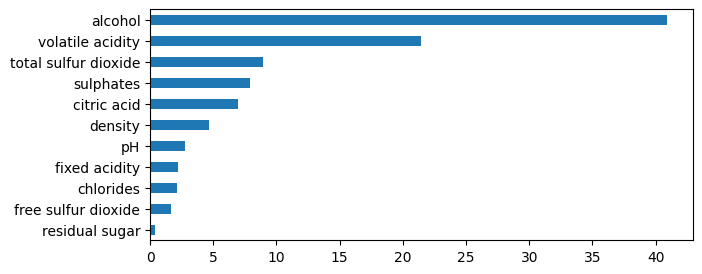

In [25]:
#ANNOVA FEATURE SELECTION
fs = SelectKBest(score_func=f_classif, k="all")
fs.fit(X, Yr)

fcontr = (fs.scores_ / sum(fs.scores_)) * 100

feat_imp = {}

for i, j in zip(df.drop(['target','quality'],axis=1).columns,fcontr):
    feat_imp[i] = j

pd.Series(feat_imp).sort_values().plot(kind='barh',figsize=(7,3))

drop = [
    'resi',
    'free',
    'chlo',
    'fixe',
    'pH'
]

X.columns.drop(drop)

We confirm the predictors with low correlation with the response, are the ones which have the lowest F-scores and hence lowest contribution to predicting the response.

In [26]:
#P-VALUES OF F-TEST
pd.Series(fs.pvalues_,index=df.drop(['target','quality'],axis=1).columns,name="P-values of F-test")

fixed acidity            9.232552e-06
volatile acidity         4.083902e-58
citric acid              5.033010e-19
residual sugar           3.825579e-01
chlorides                1.477510e-05
free sulfur dioxide      2.521301e-04
total sulfur dioxide     1.053065e-24
density                  9.831892e-13
pH                       2.117643e-07
sulphates                1.138147e-21
alcohol                 1.240564e-104
Name: P-values of F-test, dtype: float64

The P-values of the F-test confirm that the predicotrs - **residual sugar, free sulfur dioxide, chlorides and fixed acidity** can be safely removed from the analysis without much difference to prediction results. 

### Machine Learning 

##### Breif

In this section we will train, test and compare various machine learning models to find out which is the best model design for this classification task. 

Models used:
1. Standard OLS
2. Linear Discriminant Ananlysis
3. Quadratic Discriminant Analysis
4. Decision Tree Cl
5. Random Forest Cl
6. AdaBoost Cl
7. GradientBoost Cl
8. XGBoost Cl
9. XGRFBoost Cl
10. ExtraTree Cl

Metrics used:
1. Accuracy
2. Precision
3. Recall
4. F1 score
5. log loss

##### Standard OLS and Logistic regression

In [27]:
#STANDARD OLS REGRESSION AGAINST DISCRETE REGRESSORS WILL PRODUCE OMNIOUS RESULTS. PREDICTION FROM THIS MODEL WILL NOT BE MADE.
k="+".join(dfr.columns.drop(['qual','targ']).drop(drop))
model1 = ols(formula=f"qual ~{k}" ,data=dfr)
res1 = model1.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qual   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     139.4
Date:                Fri, 05 May 2023   Prob (F-statistic):          5.05e-142
Time:                        12:03:41   Log-Likelihood:                -1586.4
No. Observations:                1596   AIC:                             3187.
Df Residuals:                    1589   BIC:                             3224.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6366      0.016    343.658      0.000       5.604       5.669
vola          -0.2236      0.021    -10.726      0.000      -0.265      -0.183
citr          -0.0185      0.023     -0.788      0.431      -0.064       0.027
tota          -0.0709      0.017     -4.177      0.000      -0.104      -0.038
dens           0.0193      0.023      0.855      0.392      -0.025       0.063
sulp           0.1208      0.018      6.877      0.000       0.086       0.155
alco           0.3257      0.021     15.597      0.000       0.285       0.367
==============================================================================
Omnibus:                       28.870   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.655
Skew:                          -0.158   Prob(JB):                     1.22e-10
Kurtosis:                       3.766   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#STANDARD LOGISTIC REGRESSION
import statsmodels.api as sm

xtrd = xtr.drop(drop,axis=1)
xted = xte.drop(drop,axis=1)

log_reg = sm.Logit(ytrr, xtr.drop(drop,axis=1))
log_pred = log_reg.fit()
y_pred = log_pred.predict(xted)
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
log_pred.summary()

Optimization terminated successfully.
         Current function value: 0.529307
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   targ   No. Observations:                 1276
Model:                          Logit   Df Residuals:                     1270
Method:                           MLE   Df Model:                            5
Date:                Fri, 05 May 2023   Pseudo R-squ.:                  0.2321
Time:                        12:03:42   Log-Likelihood:                -675.40
converged:                       True   LL-Null:                       -879.53
Covariance Type:            nonrobust   LLR p-value:                 4.876e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vola          -0.7195      0.098     -7.377      0.000      -0.911      -0.528
citr          -0.2918      0.101     -2.886      0.004      -0.490      -0.094
tota          -0.3792      0.073     -5.227      0.000      -0.521      -0.237
dens           0.1535      0.094      1.632      0.103      -0.031       0.338
sulp           0.3646      0.068      5.383      0.000       0.232       0.497
alco           1.0333      0.093     11.075      0.000       0.850       1.216
==============================================================================
"""

In [29]:
#accuracies = cross_val_score(estimator=log_pred, X=xtrd, y=ytrr, cv=5)
print("Logistic Regression:")
print("Accuracy: ",accuracy_score(y_pred, ytee))
print("F1: ",f1_score(y_pred, ytee, average="macro"))
print("Precision: ",precision_score(y_pred, ytee, average="macro"))
print("Accuracy: ",recall_score(y_pred, ytee, average="macro"))

Logistic Regression:
Accuracy:  0.75
F1:  0.7499902339935155
Precision:  0.75
Accuracy:  0.7500390686044694


##### Trees and Ensemble

In [30]:
#ENSEMBLE AND TREES - 
models = [
    DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best',),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreeClassifier(criterion='entropy',splitter='best'),
    lda(solver='svd',store_covariance=True),
    qda(store_covariance=True),
    XGBClassifier(),
    XGBRFClassifier()
    ]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(xtrd, ytrr)
    y_pred = model.predict(xted)
    accuracies = cross_val_score(estimator=model, X=xtrd, y=ytrr, cv=5)
    print(classification_report(ytee, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)[:20]}"] = [
        accuracy_score(y_pred, ytee),
        f1_score(y_pred, ytee, average="macro"),
        precision_score(y_pred, ytee, average="macro"),
        recall_score(y_pred, ytee, average="macro"),
        (accuracies.mean()),
        log_loss(y_pred, ytee)
    ]

Model: DecisionTreeClassifier(criterion='entropy', random_state=0)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       160
           1       0.73      0.78      0.76       160

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       160
           1       0.75      0.81      0.78       160

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

------------------------------ 

Model: KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       160
           1       0.69  

In [31]:
models_comparison

{'DecisionTreeClassifi': [0.746875,
  0.7465755433666735,
  0.746875,
  0.7480474115938616,
  0.7312040441176471,
  9.123549764120279],
 'RandomForestClassifi': [0.76875,
  0.7683065242064889,
  0.76875,
  0.7708234923634073,
  0.802515318627451,
  8.335094846233341],
 'KNeighborsClassifier': [0.715625,
  0.7143950019125336,
  0.715625,
  0.7194045868277754,
  0.7256924019607844,
  10.249913932530191],
 'AdaBoostClassifier()': [0.70625,
  0.7056866658839185,
  0.70625,
  0.7078412848370336,
  0.7406158088235294,
  10.587823183053164],
 'GradientBoostingClas': [0.74375,
  0.7433891409795024,
  0.74375,
  0.7451288497800126,
  0.7625459558823529,
  9.236186180961269],
 'ExtraTreeClassifier(': [0.765625,
  0.7656043988241155,
  0.765625,
  0.7657184166308468,
  0.7460998774509804,
  8.447731263074331],
 'LinearDiscriminantAn': [0.75,
  0.7495205667097179,
  0.75,
  0.7519288301054952,
  0.7429595588235294,
  9.010913347279288],
 'QuadraticDiscriminan': [0.74375,
  0.7429366354480975,
  0.

In [32]:
#MODEL COMPARISION
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
    "Log-Loss"
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df

Model Accuracy  Model F1-Score  Precision    Recall   
XGBRFClassifier(base        0.778125        0.777497   0.778125  0.781301  \
RandomForestClassifi        0.768750        0.768307   0.768750  0.770823   
ExtraTreeClassifier(        0.765625        0.765604   0.765625  0.765718   
XGBClassifier(base_s        0.759375        0.758977   0.759375  0.761099   
LinearDiscriminantAn        0.750000        0.749521   0.750000  0.751929   
DecisionTreeClassifi        0.746875        0.746576   0.746875  0.748047   
GradientBoostingClas        0.743750        0.743389   0.743750  0.745129   
QuadraticDiscriminan        0.743750        0.742937   0.743750  0.746875   
KNeighborsClassifier        0.715625        0.714395   0.715625  0.719405   
AdaBoostClassifier()        0.706250        0.705687   0.706250  0.707841   

                      CV Accuracy   Log-Loss  
XGBRFClassifier(base     0.765674   7.997186  
RandomForestClassifi     0.802515   8.335095  
ExtraTreeClassifier(     0.746100   8.447731  
XGBClassifier(base_s     0.791550   8.673004  
LinearDiscriminantAn     0.742960   9.010913  
DecisionTreeClassifi     0.731204   9.123550  
GradientBoostingClas     0.762546   9.236186  
QuadraticDiscriminan     0.747641   9.236186  
KNeighborsClassifier     0.725692  10.249914  
AdaBoostClassifier()     0.740616  10.587823

### Deep Learning

Here I will build a simple Neural network for a mulit-label classification. I do not expect the results to be drastically different from the machine learning ones.

In [33]:
#BASIC PRE-PROCESSING FOR TENSORFLOW IMPLEMENTATION
xtr = xtr.to_numpy().reshape(xtr.shape[0],xtr.shape[1])
xte = xte.to_numpy().reshape(xte.shape[0],xte.shape[1])

ytr = ytr - 3
yte = yte - 3

yt = ytr.to_list()
ytr = tf.keras.utils.to_categorical(y=yt,num_classes=6,dtype='uint8')

xtr.shape,ytr,yt[:7]

((1276, 11),
 array([[0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        ...,
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0]], dtype=uint8),
 [4.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0])

In [34]:
#BUILDING THE MODEL
import tensorflow as tf

model = tf.keras.Sequential(name="Wine_classifier")
model.add(tf.keras.layers.Dense(units=1000,activation='relu',input_dim=xtr.shape[1]))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

2023-05-05 12:03:47.016501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 12:03:47.105121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 12:03:47.105187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 12:03:47.106449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 12:03:47.106511: I tensorflow/compile

Model: "Wine_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              12000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 563,206
Trainable params: 563,206
Non-trainable params: 0
_________________________________________________________________


In [35]:
#FITTING THE MODEL
history = model.fit(
    x = xtr,
    y = ytr,
    batch_size=32,
    epochs=1000
)

Epoch 1/1000


2023-05-05 12:03:50.840447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-05 12:03:50.872563: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x559240fd3470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-05 12:03:50.872600: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-05-05 12:03:50.915302: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-05 12:03:52.318125: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:417] Loaded runtime CuDNN library: 8.2.4 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgra

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/manashwy/corizo/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/manashwy/corizo/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/manashwy/corizo/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/manashwy/corizo/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_643/2157979913.py", line 2, in <module>
      history = model.fit(
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/engine/training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 543, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 1174, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 650, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 1200, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 1250, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/manashwy/corizo/lib/python3.10/site-packages/keras/optimizers/optimizer.py", line 1245, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
RET_CHECK failure (tensorflow/compiler/xla/service/gpu/gpu_compiler.cc:618) dnn != nullptr 
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_1134]

1000 1000


Text(0.5, 1.0, 'loss')

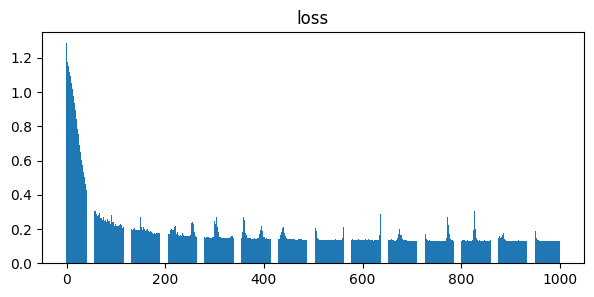

In [ ]:
#LOSS PLOTTING
plt.figure(figsize=(7,3))
x=history.history['loss']
y=[i for i in range(1000)]
print(len(x),len(y))
plt.bar(x=y,height=x);plt.title("loss")

In [ ]:
#MODEL PREDICTION
ytt = model.predict(xte)
ytf = np.array([i.argmax() for i in ytt])
np.sum(yte.to_list()-ytf)

10/10 [==============================] - 0s 1ms/step


42.0

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00        10
         2.0       0.37      0.39      0.38       129
         3.0       0.35      0.40      0.37       126
         4.0       0.07      0.04      0.05        54
         5.0       0.00      0.00      0.00         1

    accuracy                           0.32       320
   macro avg       0.13      0.14      0.13       320
weighted avg       0.30      0.32      0.31       320



/home/manashwy/corizo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/manashwy/corizo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/manashwy/corizo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 500x500 with 0 Axes>

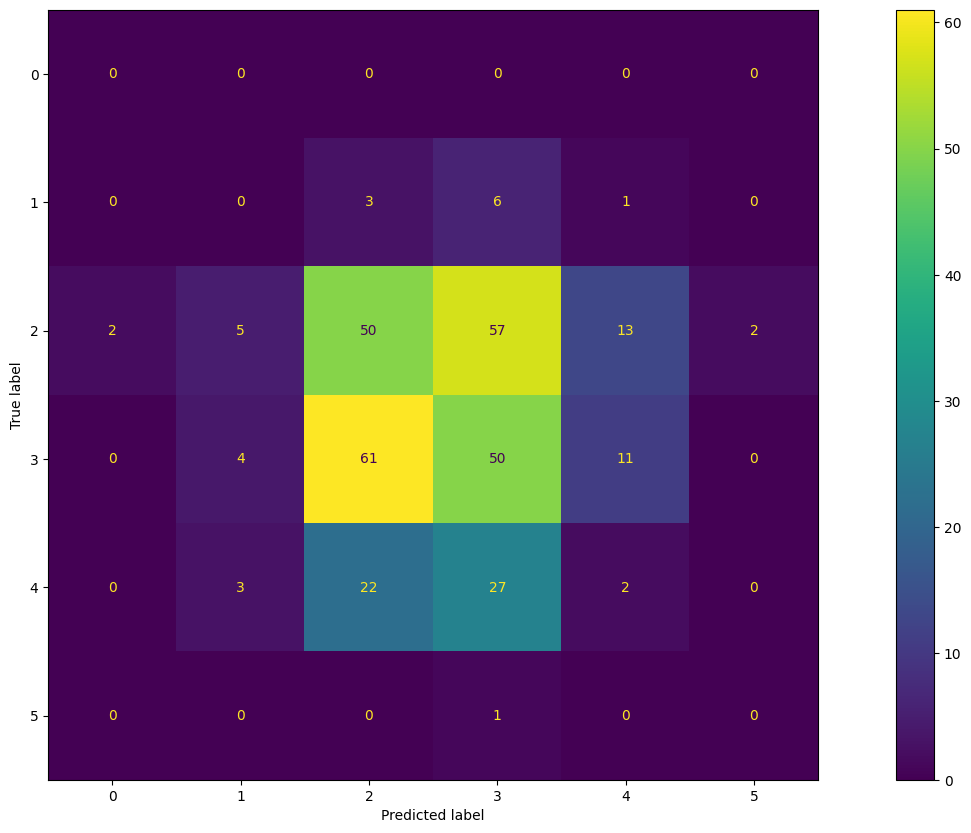

In [ ]:
#PREDICTION PLOTTING (CONFUSION MATRIX)
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(yte,ytf))
plt.figure(figsize=(5,5))
ConfusionMatrixDisplay(confusion_matrix(yte,ytf)).plot()

### Dimension Reduction

For the last section, I will try reducing dimension without dropping columns to see if prediction improves.

In [36]:
#PCA INITIALIZATION
pca  = PCA(n_components=6, )
new = pca.fit_transform(dfr.drop(['qual','targ'],axis=1))
new = pd.DataFrame(new,columns=[f'PC'+str(i) for i in range(6)])
pcx = pd.concat([new,dfr.targ],axis=1).dropna()
pcx

PC0       PC1       PC2       PC3       PC4       PC5  targ
0    -1.184137  0.525856 -1.732865 -0.401286 -0.197258  0.128593   0.0
1    -0.800174  2.937494 -1.192302  1.737727  0.136085 -2.205947   0.0
2    -0.672462  1.790164 -1.451546  1.452060 -0.053523 -1.935985   0.0
3     2.450275  0.628682 -0.188375  1.417004 -2.099064 -3.219254   1.0
4    -1.184137  0.525856 -1.732865 -0.401286 -0.197258  0.128593   0.0
...        ...       ...       ...       ...       ...       ...   ...
1591 -1.918199  0.855579  0.680296  0.192804 -0.054356  0.636637   1.0
1592 -1.707833  0.884986  1.809096  0.396316  0.107011  0.471634   1.0
1593 -1.212215  0.329696  1.094743  0.449247  0.242866  0.375910   1.0
1594 -1.640547  1.027591  0.606992  0.343608 -0.041072  0.629371   0.0
1595 -0.209357 -0.660664  1.602582  0.011170  0.287941 -0.397789   1.0

[1593 rows x 7 columns]

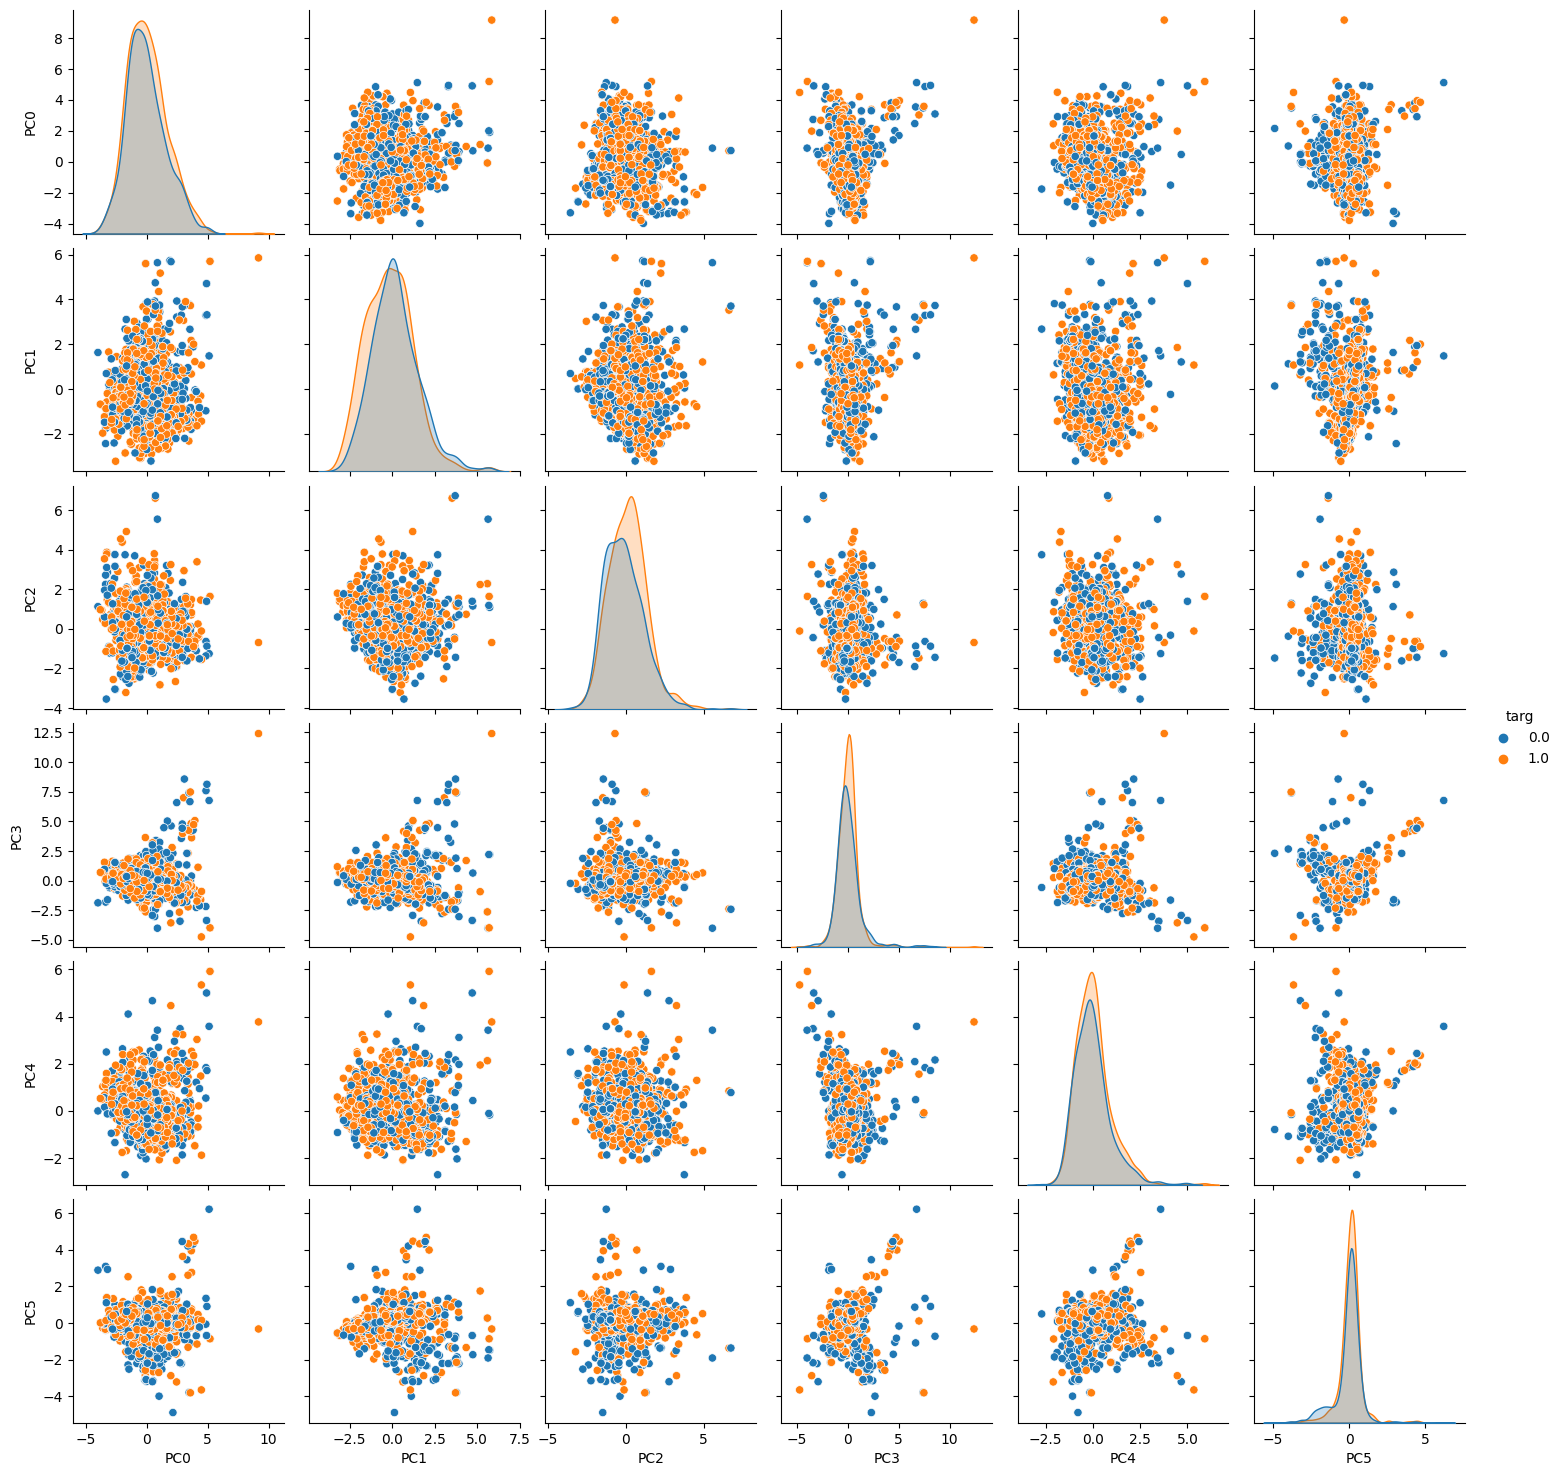

In [ ]:
import seaborn as sns
sns.pairplot(pcx,hue='targ')

In [37]:
#MODEL BUILDING
X = pcx.drop(['targ'],axis=1)
Y = pcx['targ']

(xtr,xte,ytr,yte) = ttt(X,Y,train_size=0.8)

models = [
    DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best',),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreeClassifier(criterion='entropy',splitter='best'),
    lda(solver='svd',store_covariance=True),
    qda(store_covariance=True),
    XGBClassifier(),
    XGBRFClassifier()
    ]
models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(xtr, ytr)
    y_pred = model.predict(xte)
    accuracies = cross_val_score(estimator=model, X=xtr, y=ytr, cv=5)
    print(classification_report(yte, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)[:20]}"] = [
        accuracy_score(y_pred, yte),
        f1_score(y_pred, yte, average="macro"),
        precision_score(y_pred, yte, average="macro"),
        recall_score(y_pred, yte, average="macro"),
        (accuracies.mean()),
        log_loss(y_pred, yte)
    ]
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
    "Log-Loss"
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df

Model: DecisionTreeClassifier(criterion='entropy', random_state=0)

              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49       143
         1.0       0.58      0.55      0.56       176

    accuracy                           0.53       319
   macro avg       0.53      0.53      0.53       319
weighted avg       0.53      0.53      0.53       319

------------------------------ 

Model: RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

         0.0       0.53      0.47      0.50       143
         1.0       0.60      0.66      0.63       176

    accuracy                           0.57       319
   macro avg       0.57      0.56      0.56       319
weighted avg       0.57      0.57      0.57       319

------------------------------ 

Model: KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47       143
         1.0       0.59  

Model Accuracy  Model F1-Score  Precision    Recall   
GradientBoostingClas        0.620690        0.603727   0.605769  0.615789  \
XGBRFClassifier(base        0.601881        0.585184   0.587413  0.594893   
AdaBoostClassifier()        0.598746        0.581365   0.583916  0.591476   
LinearDiscriminantAn        0.595611        0.576361   0.579764  0.588095   
RandomForestClassifi        0.573668        0.563366   0.563811  0.565863   
XGBClassifier(base_s        0.564263        0.560880   0.561189  0.560850   
KNeighborsClassifier        0.551724        0.541339   0.541958  0.543194   
ExtraTreeClassifier(        0.539185        0.535607   0.535839  0.535641   
DecisionTreeClassifi        0.529781        0.526875   0.527316  0.527101   
QuadraticDiscriminan        0.583072        0.514349   0.550044  0.585517   

                      CV Accuracy   Log-Loss  
GradientBoostingClas     0.562825  13.671731  
XGBRFClassifier(base     0.571459  14.349668  
AdaBoostClassifier()     0.571456  14.462657  
LinearDiscriminantAn     0.579314  14.575647  
RandomForestClassifi     0.568316  15.366573  
XGBClassifier(base_s     0.547896  15.705542  
KNeighborsClassifier     0.516492  16.157500  
ExtraTreeClassifier(     0.559651  16.609458  
DecisionTreeClassifi     0.532154  16.948426  
QuadraticDiscriminan     0.576940  15.027605

### Conclusion

Here we conclude our findings about this project. The aim of this project was to analyse a dataset containing constituents and specifications for different samples of wines. The objective was to present such a model that be able to correctly predict the quality of the wine. The target was converted into binary, with values greater than equal to 6 were good, and the discrete regreesion problem was essentially converted into a classification problem.


First the data was pre-processed, to make it easy to deal with. This included, shortening column names, normalizing the data and train-test splitting. Then we proceeded to plot the inter-feature scatter plot and analysing the same w.r.t. the dependent variable. It was found that a clean distiction was not possible for a lot fo features. A correlation heatmap was also made to see mulit-collinearity amongst the features. Feature importance was decided based on ANNOVA F-test, and found that some of the features, including residual sugar, free sulfur dioxide, chlorides and fixed acidity were not significant in predicting the response variable. Based on this, these features were removed from the analysis.

After the dataset was ready for predictive analysis, a number of classification models, including LDA, QDA, Logistic regression, Decision tree, Random forest, Extra tree, Xgboost and xgrfboost, were used and compare amongst each other. It was found that ensemble techniques performed much better than standard tree based classifiers, with in turn performed better than discriminant analysis and logistic regression. Some of the metrics used to compare the results included accuracy, precision, recall, F1 and CV scores. A table was made to compare the results.


A simple deep learning model was also used on this dataset. The problem was made into a mulit-class classification, with 6 labels (o to 5). Three dense layers with about 550,000 parameters were added and compiled with 'categorical cross-entropy' loss and 'adam' optimizer. The model performed fairly poorly than the standard machine learning model, as the classes were imbalanced, the predictive capability was considered dubious. A confusion matrix display was used to summarize the result, of which the accuracy was a poor 32%, with a lot of mis-labelled classifications. 

Finally, a dimension reduction technique, principal component analysis, was used to reduce the dimentionality of the dataset, without dropping any columns. The number of components were set to 6, to be able to compare with the machince learning models, which had the same number of feature columns.The model performed worse than the standard machine learning models, with dropped columns. This showed us that dimension reduction, even though very usefull for unsupervised clustering, was not the optimal choice for classification problems. 

To conclude, we find that ensemble tree based models, after removing unwanted features, were the best performing models for this task of classification. 

### END